# YData Quality - DataQuality Tutorial
Time-to-Value: 4 minutes

This notebook provides a tutorial to run the `ydata_quality.DataQuality` main class that aggregates all the individual data quality engines, each focused on a main topic of data quality (e.g. duplicates, missing values).

**Structure:**

1. Load dataset
2. Distort dataset
3. Instantiate the Data Quality engine
4. Run the quality checks
5. Assess the warnings
6. (Extra) Detailed overview

In [1]:
import pandas as pd
from ydata_quality import DataQuality

## Load the example dataset
We will use a transformed version of the "Guerry" dataset available from the statsmodels package.

In [2]:
df = pd.read_csv('../datasets/transformed/guerry_histdata.csv')

## Create the main engine
The DataQuality class aggregates all the individual data quality engines, each focused on a main topic of data quality (e.g. duplicates, missing values). To create a DataQuality object, you provide:
- df: target DataFrame, for which we will run the test suite
- target (optional): target feature to be predicted in a supervised learning context
- entities (optional): list of feature names for which checking duplicates after grouping-by is applicable.
- ed_extensions (optional): list of erroneous data values to append to the defaults.

In [3]:
ED_EXTENSIONS = ['a_custom_EDV', 999999999, '!', '', 'UNKNOWN']
SENSITIVE_FEATURES = ['Suicides', 'Crime_parents', 'Infanticide']

In [4]:
dq = DataQuality(df=df, label='Pop1831', ed_extensions=ED_EXTENSIONS, results_json_path='../datasets/original/taxi_long.json', sensitive_features=SENSITIVE_FEATURES, random_state=42)

### Full Evaluation
The easiest way to assess the data quality analysis is to run `.evaluate()` which returns a list of warnings for each quality check. 

WARNING | Skipping test due to failure during computation. See results folder of this test for further details.
WARNING | Skipping test due to failure during computation. See results folder of this test for further details.


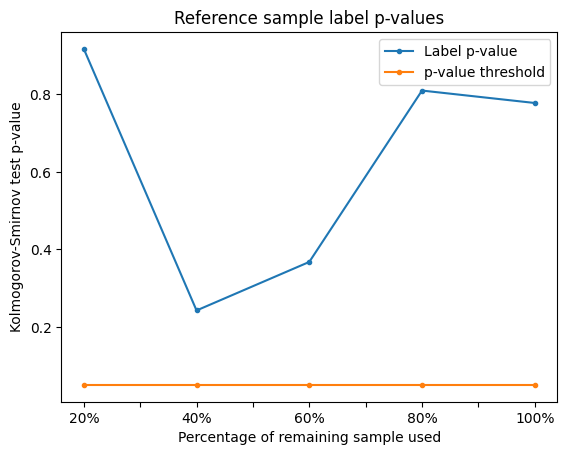

WARNING | It was not possible to normalize the label values. See the data quality warning message for additional context.
WARNING | Skipping test due to failure during computation. See results folder of this test for further details.
WARNING | Skipping test due to failure during computation. See results folder of this test for further details.


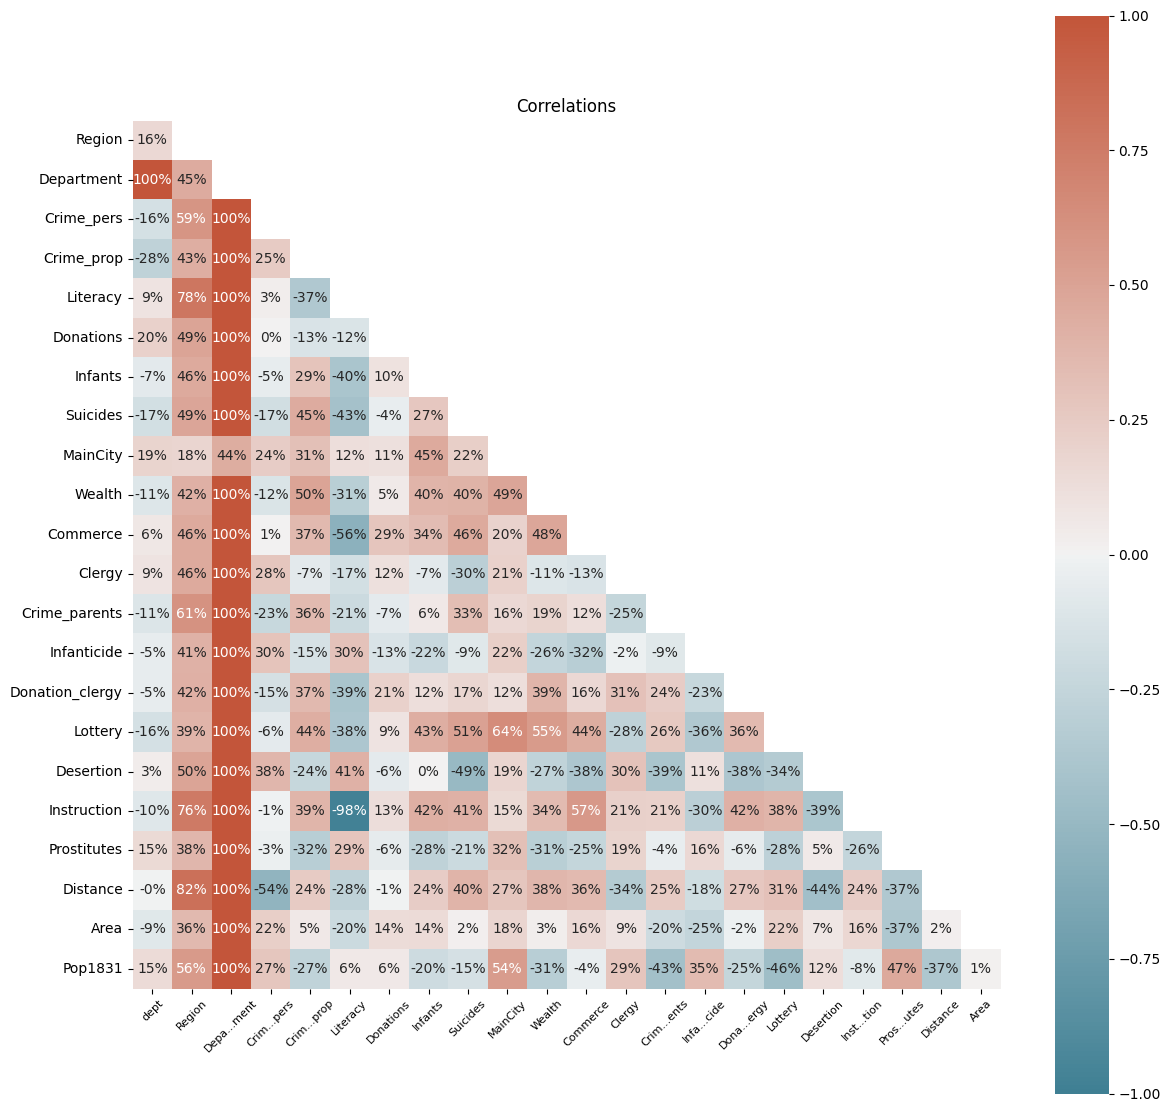

WARNING | The partial correlation matrix is not computable for this dataset. Skipping potential confounder and collider detection tests.
CRITICAL | Canceled Data Expectations engine execution due to dataset-expectation suite mismatch.


In [5]:
full_results = dq.evaluate()

## Check the status
After running the data quality checks, you can check the warnings for each individual test. The warnings are suited by priority and have additional details that can provide better insights for Data Scientists.

In [6]:
# Print the overall status of Data Quality discovered during evaluation
dq.report()

Warnings count by priority:
	Priority 1: 2 warning(s)
	Priority 2: 5 warning(s)
	TOTAL: 7 warning(s)
List of warnings sorted by priority:
	[TEST NORMALITY] The label distribution failed to pass a normality test as-is and following a battery of transforms. It is possible that the data originates from an exotic distribution, there is heavy outlier presence or it is multimodal. Addressing this issue might prove critical for regressor performance. (Priority 1: heavy impact expected)
	[DUPLICATE COLUMNS] Found 1 columns with exactly the same feature values as other columns. (Priority 1: heavy impact expected)
	[OUTLIER DETECTION] Found 2 potential outliers across the full dataset. A distance bigger than 3.0 standard deviations of intra-cluster distances to the respective centroids was used to define the potential outliers. (Priority 2: usage allowed, limited human intelligibility)
	[HIGH COLLINEARITY - CATEGORICAL] Found 3 categorical variables with significant collinearity (p-value < 0.05)

/home/fsantos/miniconda3/envs/DQ/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Quality Warning

In [7]:
# Get a sample warning
sample_warning = dq.get_warnings()[3]

In [8]:
# Check the details
sample_warning.test, sample_warning.description, sample_warning.priority

('High Collinearity - Categorical',
 'Found 3 categorical variables with significant collinearity (p-value < 0.05). The variables listed in results are highly collinear with other variables in the dataset and sorted descending according to propensity. These will make model explainability harder and potentially give way to issues like overfitting. Depending on your end goal you might want to remove variables following the provided order.',
 <Priority.P2: 2>)

In [9]:
# Retrieve the relevant data from the warning
sample_warning_data = sample_warning.data

In [10]:
# With get_warnings you can also filter the warning list by specific conditions
duplicate_quality_warnings = dq.get_warnings(category='Duplicates')
priority_2_warnings = dq.get_warnings(priority=2)